<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/solving_regretion_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction house prices

In [251]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers


In [252]:
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

In [253]:
train_data.shape

(404, 13)

In [254]:
train_targets.shape

(404,)

In [255]:
train_targets[0]
#Here show us that the first house of the data cost 15,000 dollars

15.2

In [256]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Here is neccesary a normalization, because the large diference between the values

## Normalization

In [257]:
mean = train_data.mean(axis=0)
train_data = train_data - mean #media 
std = train_data.std(axis=0)
train_data = train_data / std #standar
## Here we only use and modificate the train data, the test data isnt yet

test_data = test_data - mean
test_data = test_data / std

In [258]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(input_data,))) #13 is te variables that the houses have
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))                            #this time we don´t need clasification son we use cuadratic (mse)
    model.compile(optimizer= "rmsprop", loss="mse", metrics =["mae"])
    return model                                           #Is lineal regresion so we need this data 
    

## K-Fold validation


In [259]:
 
#iteration the dataset with the training

k = 4 #iterations
num_val_samples = len(train_data) // k
num_epoch = 85 ## original was 80
#we used 500 to estimate
all_history = [] #saving all historys

In [260]:
0*num_val_samples

0

In [261]:
(0+1) * num_val_samples

101

In [262]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


In [263]:
all_history

[[18.205007553100586,
  14.614141464233398,
  10.272372245788574,
  6.712702751159668,
  5.102138519287109,
  4.2191267013549805,
  3.6620216369628906,
  3.299421787261963,
  3.1341335773468018,
  2.9393739700317383,
  2.9005210399627686,
  2.8063652515411377,
  2.6885907649993896,
  2.5920825004577637,
  2.642726421356201,
  2.6276309490203857,
  2.506068706512451,
  2.4222052097320557,
  2.4707791805267334,
  2.4340732097625732,
  2.4596710205078125,
  2.3282880783081055,
  2.312629461288452,
  2.177553653717041,
  2.1901440620422363,
  2.1742987632751465,
  2.2196712493896484,
  2.1655967235565186,
  2.22286057472229,
  2.1909658908843994,
  2.2370779514312744,
  2.2302496433258057,
  2.2343742847442627,
  2.207742691040039,
  2.2828500270843506,
  2.220473289489746,
  2.1604509353637695,
  2.1449363231658936,
  2.17254376411438,
  2.124326705932617,
  2.0754828453063965,
  2.102574348449707,
  2.0568323135375977,
  2.030120611190796,
  2.229294776916504,
  2.205012321472168,
  2.25

In [264]:
len(all_history[0])

85

## Results

In [265]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [266]:
all_mae_avg

0     19.391671
1     16.173234
2     12.099069
3      8.369162
4      6.277132
        ...    
80     2.424984
81     2.402697
82     2.453173
83     2.460375
84     2.529568
Length: 85, dtype: float64

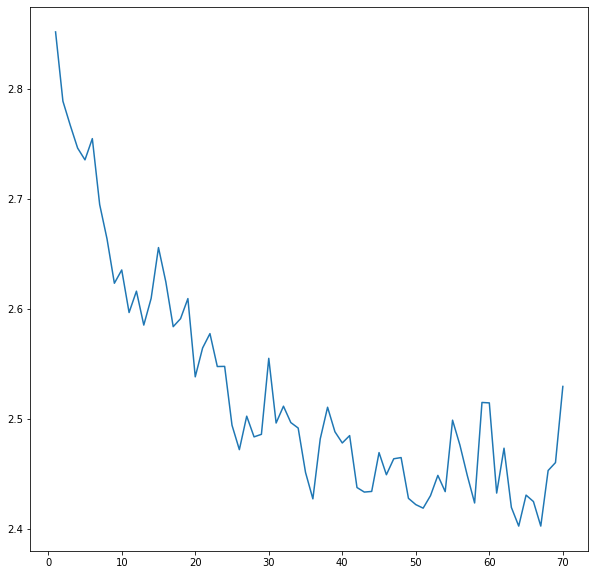

In [267]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [268]:
model.evaluate(test_data, test_targets)
#mean absolut error

4/4 [==============================] - 0s 5ms/step - loss: 20.9415 - mae: 2.8664


[20.941452026367188, 2.866361618041992]